In [184]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [194]:
trainDir = "Dataset/Train"
testDir = "Dataset/Test"
numClasses = 3
chkpoint_model_loc = 5
checkpoint_dir="Cnn_Checkpoints"
classes = ["Bike","Car","Person"]


In [186]:
import os
from os import walk

transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
train_dataset = datasets.ImageFolder(trainDir,transform=transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(trainDir,transform=transform)

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)




In [187]:
class CNN_Class(nn.Module):
    def __init__(self, num_classes):
        super(CNN_Class, self).__init__()
        self.conv1 = nn.Conv2d(3, 2, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 28 * 28, 4096)  
        self.fc1 = nn.Linear(4096, num_classes)   

    def forward(self, x):
        x = self.maxpool(torch.relu(self.conv1(x)))
        x = x.view(-1,32*28*28)
        print(x.shape)
        x = torch.relu(self.fc(x))
        x = self.fc1(x)
        return x

In [188]:
num_epochs = 10
model = CNN_Class(3)
checkpoint_interval = 2  # Save checkpoints every 2 epochs
checkpoint_path = 'Cnn_Checkpoints/'
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cpu")
train_losses = []
test_loss = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_dataloader:
        images, labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss/len(train_dataloader.dataset)
    train_losses.append(train_loss)
    

print('Finished training')

torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([19, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([19, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 

In [189]:
def evaluate_checkpoint(checkpoint_path):
    model.load_state_dict(torch.load(checkpoint_path))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Evaluate checkpoints and report convergence history
convergence_history = []
for checkpoint_file in os.listdir(checkpoint_dir):
    if checkpoint_file.endswith(".pth"):
        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_file)
        accuracy = evaluate_checkpoint(checkpoint_path)
        convergence_history.append((checkpoint_path, accuracy))
        print(f'Checkpoint: {checkpoint_file}, Accuracy: {accuracy:.2f}%')

# Report convergence history
for checkpoint_path, accuracy in convergence_history:
    print(f'Checkpoint: {checkpoint_path}, Accuracy: {accuracy:.2f}%')

In [190]:
true_labels = []
predicted_labels = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([32, 25088])
torch.Size([19, 25088])


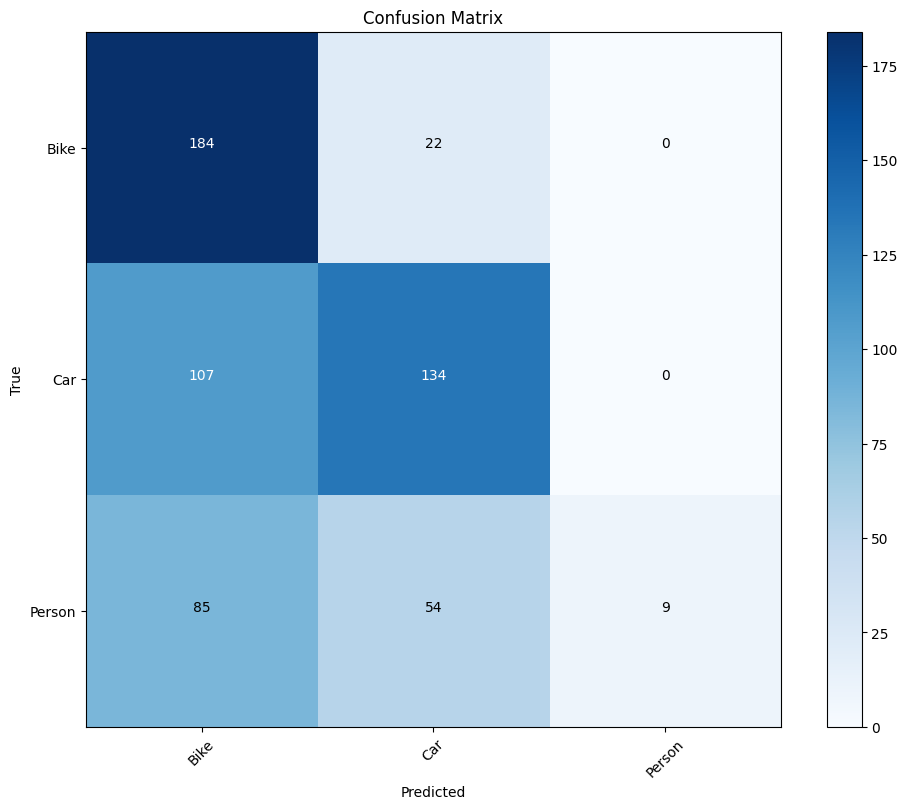

In [195]:
import numpy
import itertools

confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = numpy.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], fmt),
             horizontalalignment="center",
             color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()